In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('data4a.csv')

In [3]:
data.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
N    100 non-null int64
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


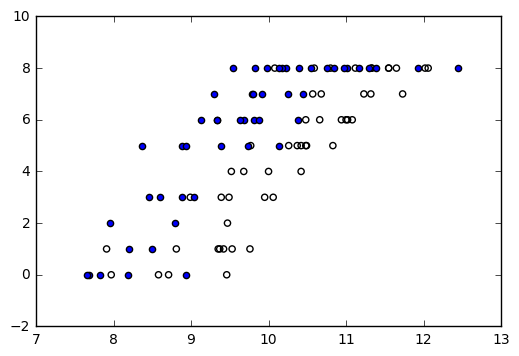

In [6]:
plt.scatter(data[data.f=='C'].x,data[data.f=='C'].y,label='C',facecolor='none')
plt.scatter(data[data.f=='T'].x,data[data.f=='T'].y,label='T')

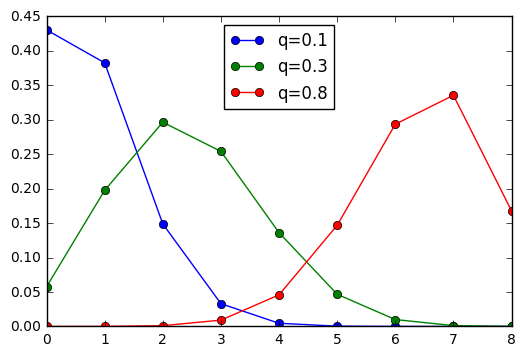

In [14]:
x = np.arange(0,9)
plt.plot(x,stats.binom.pmf(x,8,0.1),'o-',label='q=0.1')
plt.plot(x,stats.binom.pmf(x,8,0.3),'o-',label='q=0.3')
plt.plot(x,stats.binom.pmf(x,8,0.8),'o-',label='q=0.8')
plt.legend(loc='upper center')

In [17]:
def logistic(beta1,beta2,x):
    return 1 / (1 + np.exp(-(beta1+beta2*x)))

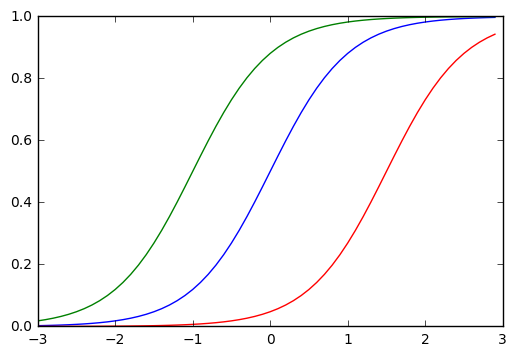

In [18]:
x = np.arange(-3,3,0.1)
plt.plot(x,logistic(0,2,x))
plt.plot(x,logistic(2,2,x))
plt.plot(x,logistic(-3,2,x))

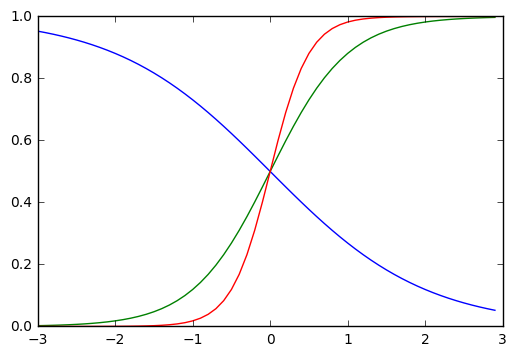

In [19]:
plt.plot(x,logistic(0,-1,x))
plt.plot(x,logistic(0,2,x))
plt.plot(x,logistic(0,4,x))

In [21]:
data['f_int'] = (data.f == 'T').astype(int)

In [22]:
data.x_c = sm.add_constant(data[['x','f_int']])

In [23]:
data['N-y'] = data['N'] - data['y']

In [24]:
model = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial())
result = model.fit()

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Tue, 31 Jan 2017   Deviance:                       123.03
Time:                        23:52:07   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -19.5361      1.414    -13.818      0.000       -22.307   -16.765
x              1.9524      0.139     14.059      0.000         1.680     2.225
f_int          2.0215      0.231      8.740      0.000         1.568     2.475
==============================================================================
"""

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


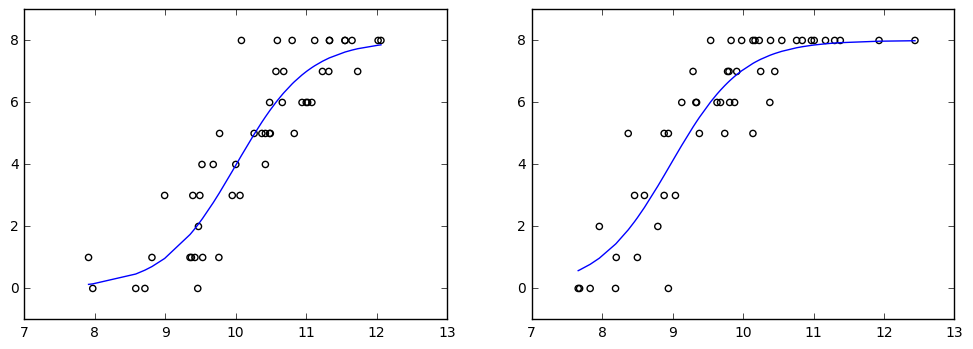

In [48]:
x_c = data.x_c[data.x_c['f_int']==0].sort_index(by='x')
x_t = data.x_c[data.x_c['f_int']==1].sort_index(by='x')
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(x_c.x,result.predict(x_c)*8)
ax[0].scatter(data[data.f=='C'].x,data[data.f=='C'].y,facecolor='none')
ax[1].plot(x_t.x,result.predict(x_t)*8)
ax[1].scatter(data[data.f=='T'].x,data[data.f=='T'].y,facecolor='none')

In [49]:
data.head()

,N,y,x,f,f_int,N-y
0,8,1,9.76,C,0,7
1,8,6,10.48,C,0,2
2,8,5,10.83,C,0,3
3,8,6,10.94,C,0,2
4,8,1,9.37,C,0,7


In [56]:
summary = []
llh = np.sum(stats.binom.logpmf(data.y,8,data.y/8.))
k = data.shape[0]
deviance = -2*llh
residual_deviance = 0
aic = -2 * (llh - 100)

summary.append(['full',k,llh,deviance,residual_deviance,aic])

In [57]:
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data[['y','N-y']],data.x_c['const'],family=sm.families.Binomial())
result = model.fit()
summary.append(['const',result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])

In [58]:
import itertools
columns = ['f_int','x']
for i in range(2):
    for a in itertools.combinations(columns,i+1):
        data.x_c = sm.add_constant(data[list(a)])
        model = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial())
        result = model.fit()
        summary.append([list(a),result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])

col_names = ['model','k','logL','deviance','residual deviance','AIC']
result_table = pd.DataFrame(summary,columns=col_names)

In [59]:
result_table

,model,k,logL,deviance,residual deviance,AIC
0,full,100,-71.588619,143.177239,0.000000,343.177239
1,const,1,-321.204671,642.409342,499.232103,644.409342
2,[f_int],2,-316.879877,633.759753,490.582514,637.759753
3,[x],2,-180.172722,360.345443,217.168204,364.345443
4,"[f_int, x]",3,-133.105565,266.211129,123.033890,272.211129


In [60]:
data['x*f'] = data.x * data.f_int

In [62]:
data.x_c = sm.add_constant(data[['x','f_int','x*f']])
model = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Wed, 01 Feb 2017   Deviance:                       122.43
Time:                        00:34:20   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -18.5233      1.886     -9.821      0.000       -22.220   -14.827
x              1.8525      0.186      9.983      0.000         1.489     2.216
f_int         -0.0638      2.704     -0.024      0.981        -5.363     5.235
x*f            0.2163      0.280      0.772      0.440        -0.333     0.765
==============================================================================
"""

In [63]:
result.aic

273.61059672597401

In [64]:
data = pd.read_csv('data4b.csv')

In [65]:
data.head()

,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0


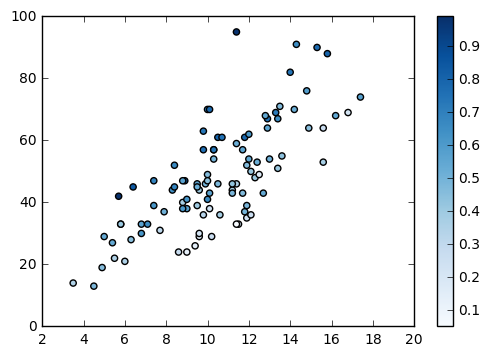

In [66]:
plt.scatter(data.A,data.y,c=data.x,cmap='Blues')
plt.colorbar()

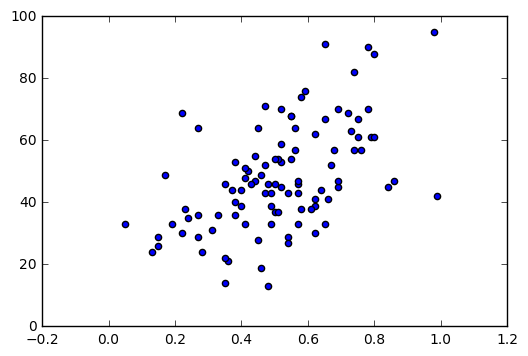

In [67]:
plt.scatter(data.x,data.y)

In [68]:
data.x_c = sm.add_constant(data.x)

In [69]:
model = sm.GLM(data.y,data.x_c,offset=np.log(data.A),family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Wed, 01 Feb 2017   Deviance:                       81.608
Time:                        00:42:12   Pearson chi2:                     81.5
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9731      0.045     21.600      0.000         0.885     1.061
x              1.0383      0.078     13.364      0.000         0.886     1.191
==============================================================================
"""

In [70]:
data['prediction'] = result.predict()

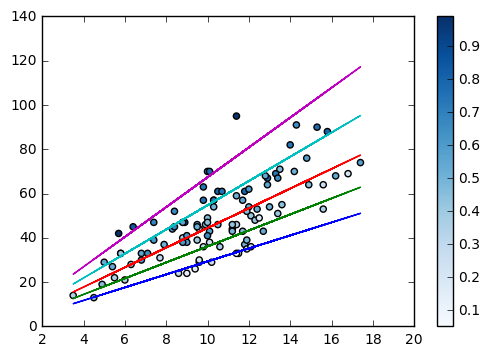

In [71]:
plt.scatter(data.A,data.y,c=data.x,cmap='Blues')
plt.colorbar()

plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.1))
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.3))
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.5))
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.7))
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.9))

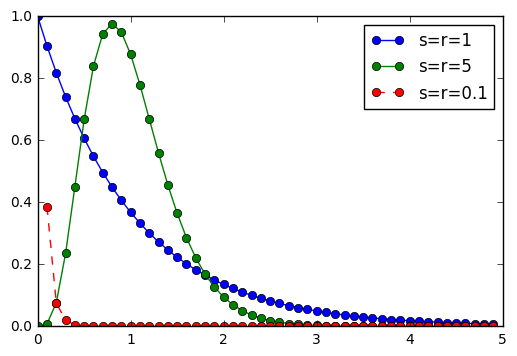

In [75]:
x = np.arange(0,5,0.1)

plt.plot(x,stats.gamma.pdf(x,a=1,scale=1),"-o",label='s=r=1')
plt.plot(x,stats.gamma.pdf(x,a=5,scale=1/5.),'-o',label='s=r=5')
plt.plot(x,stats.gamma.pdf(x,a=0.1,scale=0.1),'o--',label='s=r=0.1')
plt.legend()

In [78]:
import readline
import rpy2.robjects as robjects
robjects.r['load']('d.RData')
data = pd.DataFrame(np.array(robjects.r['d']).T,columns=['x','y'])

In [80]:
data['logx'] = np.log(data.x)
data.x_c = sm.add_constant(data.logx)
model = sm.GLM(data.y,data.x_c,family=sm.families.Gamma(link=sm.families.links.log))
result = model.fit()
print result.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.325084605974
Method:                          IRLS   Log-Likelihood:                 58.471
Date:              水, 01  2月 2017   Deviance:                       17.251
Time:                        00:58:03   Pearson chi2:                     15.6
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.0403      0.119     -8.759      0.000        -1.273    -0.808
logx           0.6832      0.068      9.992      0.000  

In [81]:
data['prediction'] = result.predict()

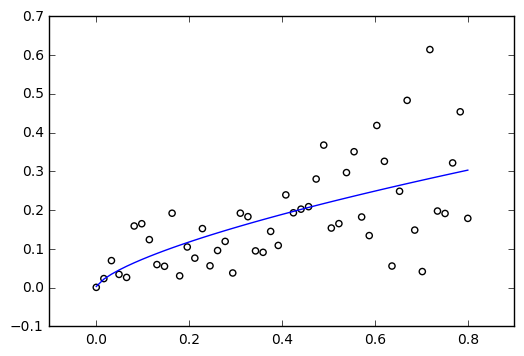

In [83]:
data_sort = data.sort_values('x')
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(data_sort.x,data_sort.prediction)